<a href="https://colab.research.google.com/github/Lucas-Miller-OIT/electrodynamics/blob/master/REE_330_Final_Project_Charged_Particle_Trajectories_in_Time_Dependent_Magnetic_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REE 330 Final Project 
# Charged Particle Trajectories in Time-Dependent Electromagnetic Fields

Kole Pitts and Lucas Miller


In [35]:
# Import the important stuff
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint

# Background 

For our final project, we wanted to explore the behavior of a charged particle in an electromagnetic field. Since this was one of the key concepts discussed throughout the semester, we set out to create a series of plots describing the effects of both E and B fields on a charged particle in a vacuum. 

# Charged Particle in Uniform, Static Magnetic Field

A charged particle experiences a force when moving through a magnetic field. The simplest example of this phenomenon occurs when a charged particle moves perpendicular to a uniform  magnetic field. 

Assuming the field is in a vacuum, the strength and direction of the magnetic field dictates the motion of the charged particle in space. The force of the magnetic field applied to the particle will be perpendicular to its trajectory, so a charged particle should follow a swirling, circular path. 

Since the force of the magnetic field is always perpendicular to the particle's motion, no work is done on the particle and its velocity remains constant. Direction of motion will be affected, but no change in acceleration will occur.

**Uniform** means constant magnitude in all directions in space. 
**Static** means the field is independent of time.

# Charged Particle in Uniform, Static Electric Field

A charged particle also experiences a force in the presence of an electric field. In this case, the particle experiences a force and is accelerated in the direction of the unbalanced force -- i.e., from a positively charged region to a negatively charged region, or vice versa. 

If the particle is free to move, the electric field does work on it, converting potential energy to kinetic energy. The work done is proportional to the product of the magnitude of charge and the potential of the field. 

# Charged Particle in Uniform, Static Electromagnetic Field

When taken together, a static, uniform electromagnetic field will apply a Lorenz force on the particle proportional to the following equation:

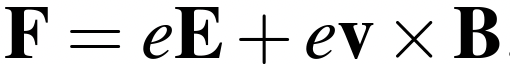

where v is the inital velocity of the particle. This is the equation we will plot in the following sections. 

# Part 1 - Plotting Trajectory in Uniform, Static Electromagnetic Fields

Variables:


*   Initial position (x,y,z)
*   Initial velocity (Vx, Vy, Vz)
*   Electric field strength (Ex, Ey, Ez)
*   Magnetic Field strength (Bx, By, Bz)




In [36]:
# Define electric and magnetic fields.
Ex = 0
Ey = 0
Ez = 1
E = np.array([Ex, Ey, Ez])

Bx = 0
By = 1
Bz = 0
B = np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 501
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = 0
Y0 = 0
Z0 = 0

VX0 = 1
VY0 = 1
VZ0 = 1

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

Text(0.5, 0, 'Z')

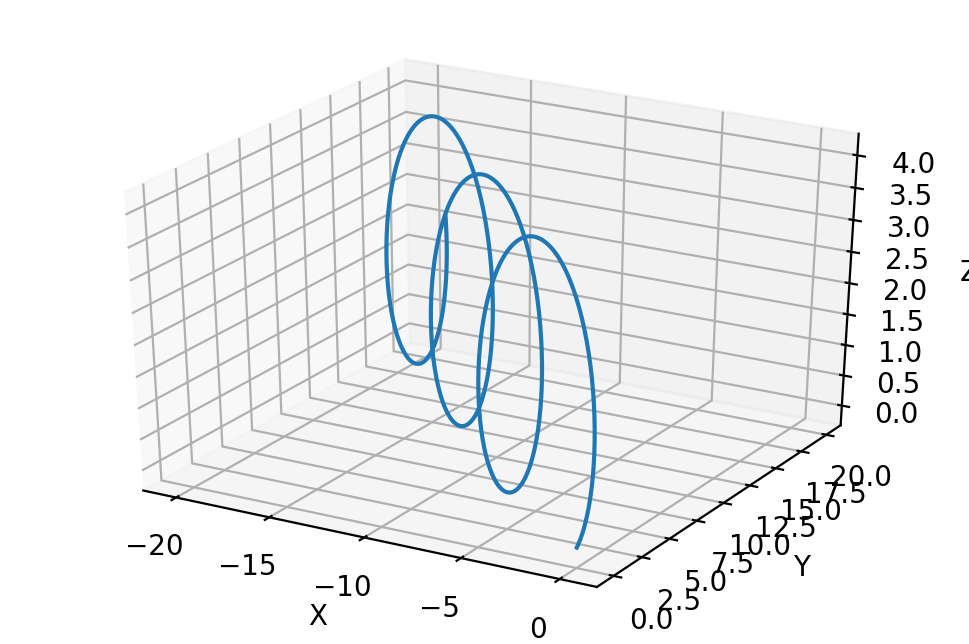

In [37]:
# Define the derivative function.
def dy_dt(y, t, E, B):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    E = [Ex, Ey, Ez] is the electric field
    B = [Bx, By, Bz] is the magnetic field
    
    The function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    dy = np.zeros(6)
    
    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]
    
    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])
    
    # Return the derivative array.
    return dy

# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(E,B))
x, y, z, vx, vy, vz = trajectory.transpose()

# Plot the result.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Part 2 - Time-Dependent Electromagnetic Fields

We can make minor modifications to Steps 2 and 3 to study a much wider range of problems.  Instead of defining ***constant values*** for the electric and magnetic fields in Step 1, we can define ***functions***.

Maxwell's equations hold true even in time-varying conditions, so we can use the same Lorenz force equation as in Part 1. This time, instead of constant electric and magnetic fields we will set functions for E(t) and B(t).


Variables:


*   Initial position (x,y,z)
*   Initial velocity (Vx, Vy, Vz)
*   Electric field strength (E(t)x, E(t)y, E(t)z)
*   Magnetic Field strength (B(t)x, B(t)y, B(t)z)


Fields that were tested and plotted (plots included in presentation file to conserve notebook size/space):


*   Rotating electric and magnetic fields 90 degrees out of phase
*   Rotating electric and magnetic fields 90 degrees out of phase (particle at rest)
*   Rotating electric and magnetic fields perfectly in phase
*   Field from a radio wave at 1kHz





In [38]:
# Define functions to compute electric and magnetic fields.
def getE(x,y,z,t):
    """
    Compute the electric field at location (x,y,z) at time t.
    """
    Ex = 0
    Ey = 0
    Ez = np.cos(t)
    return np.array([Ex, Ey, Ez])

def getB(x,y,z,t):
    """
    Compute the magnetic field at location (x,y,z) at time t.
    """
    Bx = 0
    By = np.cos(t)
    Bz = 0
    return np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 501
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = 0
Y0 = 0
Z0 = 0

VX0 = 0
VY0 = 0
VZ0 = 0

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

Now that *E* and *B* are functions of position and time, we need to modify the function that we send to ODEINT.

Text(0.5, 0, 'Z')

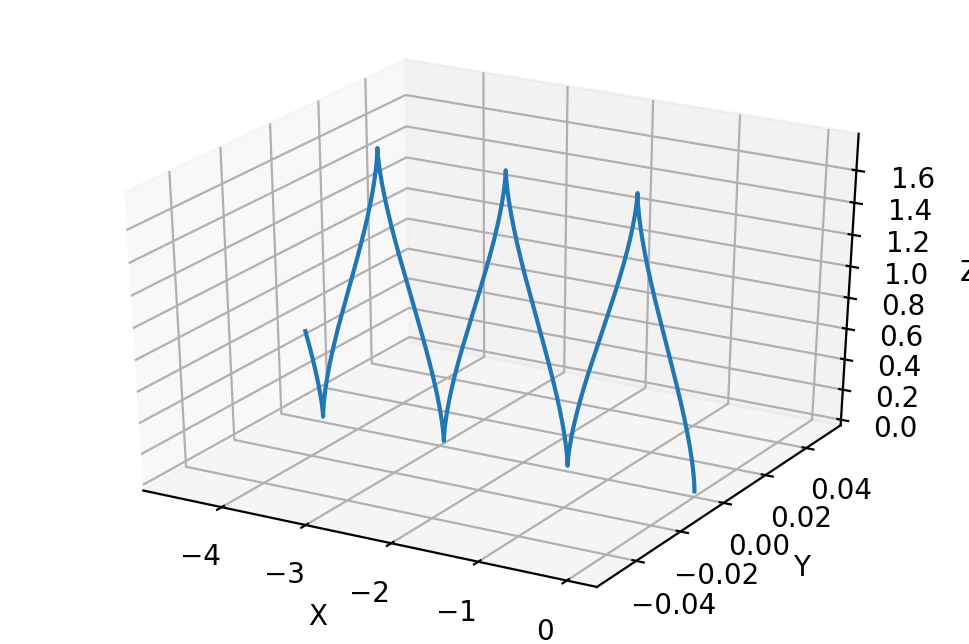

In [40]:
# Define the derivative function.
def dy_dt(y, t, e_function, b_function):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    e_function = electric field function:    e_function(x,y,z,t) should return [Ex, Ey, Ez]
    b_function = magnetic field function: b_function(x,y,z,t) should return [Bx, By, Bz]

    This function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    # Use functions provided to compute fields.
    E = getE(y[0], y[1], y[2], t)
    B = getB(y[0], y[1], y[2], t)

    # Empty array to store derivatives.
    dy = np.zeros(6)

    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]

    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])

    # Return the derivative array.
    return dy

# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(getE,getB))
x, y, z, vx, vy, vz = trajectory.transpose()

# Plot the result.
fig = plt.figure(dpi=200)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Test Code

We used this space for test code. 

In [ ]:
## TEST CODE

# Define functions to compute electric and magnetic fields.
E0 = 5

def getE(x,y,z,t):
    """
    Compute the electric field at location (x,y,z) at time t.
    """
    Ex = E0*np.sin(2*np.pi*(1000000*t - x/299.792))
    Ey = E0*np.sin(2*np.pi*(1000000*t - y/299.792))
    Ez = E0*np.sin(2*np.pi*(1000000*t - z/299.792))
    return np.array([Ex, Ey, Ez])

B0 = 5

def getB(x,y,z,t):
    """
    Compute the magnetic field at location (x,y,z) at time t.
    """
    Bx = B0*np.sin(2*np.pi*(1000000*t - x/299.792))
    By = B0*np.sin(2*np.pi*(1000000*t - y/299.792))
    Bz = B0*np.sin(2*np.pi*(1000000*t - z/299.792))
    return np.array([Bx, By, Bz])

# Define array of time values to study.
num_points = 1001
tMax = 20
t = np.linspace(0, tMax, num_points)

# Define the initial conditions.
X0 = 0
Y0 = 0
Z0 = 0

VX0 = 0
VY0 = 0
VZ0 = 0

y0 = np.array([X0, Y0, Z0, VX0, VY0, VZ0])

/usr/local/lib/python3.8/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


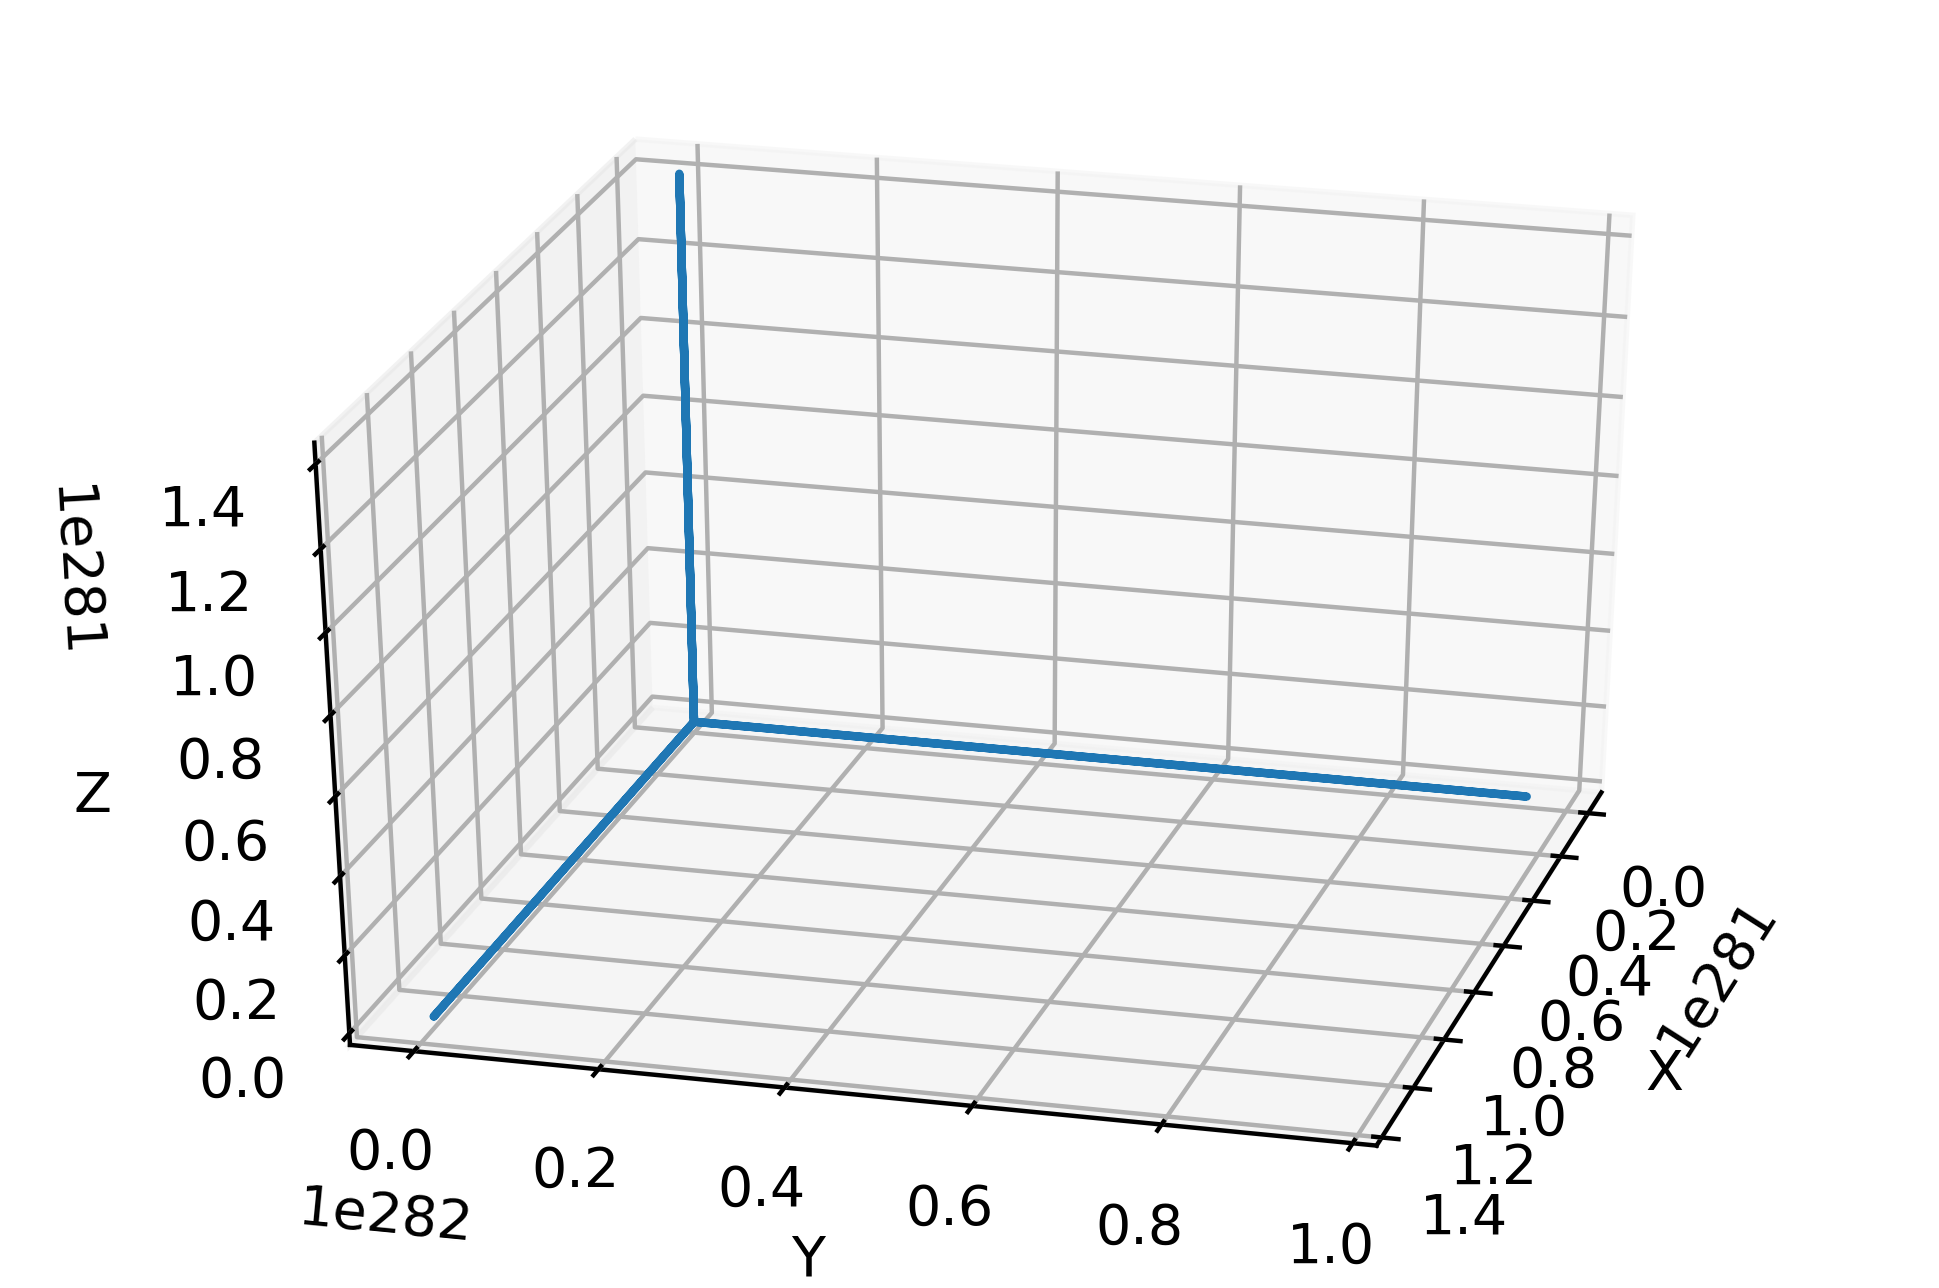

In [ ]:
# Define the derivative function.
def dy_dt(y, t, e_function, b_function):
    """
    y = [x, y, z, vx, vy, vz]
    t = time
    e_function = electric field function:    e_function(x,y,z,t) should return [Ex, Ey, Ez]
    b_function = magnetic field function: b_function(x,y,z,t) should return [Bx, By, Bz]

    This function returns dy/dt based on the Lorentz force law:
    F = E + vxB.
    """
    # Use functions provided to compute fields.
    E = getE(y[0], y[1], y[2], t)
    B = getB(y[0], y[1], y[2], t)

    # Empty array to store derivatives.
    dy = np.zeros(6)

    # Position derivatives
    dy[0] = y[3]
    dy[1] = y[4]
    dy[2] = y[5]

    # Velocity derivatives
    dy[3] = E[0] + (y[4]*B[2] - y[5]*B[1])
    dy[4] = E[1] + (y[5]*B[0] - y[3]*B[2])
    dy[5] = E[2] + (y[3]*B[1] - y[4]*B[0])

    # Return the derivative array.
    return dy

# Integrate the equations of motion.
trajectory = odeint(dy_dt, y0, t, args=(getE,getB))
x, y, z, vx, vy, vz = trajectory.transpose()

# Plot the result.
fig = plt.figure(dpi=400)
ax = fig.add_subplot(projection='3d')
ax.plot(x,y,z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(30,15)